<a href="https://colab.research.google.com/github/ValentynaGrach/ml-homeworks/blob/main/%D0%94%D0%97__11_%D0%A2%D0%B5%D0%BA%D1%81%D1%82_%D0%9D%D0%B5%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%96_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%B8_ValentynaGrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print(os.listdir())

directory_path = "/content/"
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
        print("Файл", file_name, "успішно видалено.")

['.config', 'IMDB Dataset.csv', 'sample_data']
Файл IMDB Dataset.csv успішно видалено.


# 1️⃣ завантаження та первиний аналіз IMDB *Dataset*

In [ ]:
import pandas as pd
from google.colab import files, data_table
import google.colab.data_table as data_table
import re
from collections import Counter
import numpy as np
import unicodedata
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time


In [ ]:
# Завантажуємо файл
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
IMDB = pd.read_csv(file_name)
display(data_table.DataTable(IMDB.head()))

Saving IMDB Dataset.csv to IMDB Dataset.csv


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Функція очищення тексту
def clean_text(text):
    text = text.lower()  # Приводимо до нижнього регістру
    text = re.sub(r'<.*?>', '', text)  # Видаляємо HTML-теги
    text = re.sub(r'\d+', '', text)  # Видаляємо цифри
    text = re.sub(r'[^\w\s]', '', text)  # Видаляємо пунктуацію
    text = re.sub(r'\s+', ' ', text).strip()  # Видаляємо зайві пробіли
    text = ''.join(c for c in text if unicodedata.category(c) != 'Mn')  # Видаляємо діакритичні символи
    text = re.sub(r'[_½]', '', text)  # Видаляємо спецсимволи _, ½
    return text

# Об'єднуємо всі відгуки в один рядок
all_text = " ".join(IMDB['review'])

# Підраховуємо символи до очищення
char_counts_before = Counter(all_text)
sorted_chars_before = sorted(char_counts_before.items(), key=lambda x: x[1], reverse=True)

# Вивід топ-50 символів
print("\nТоп-50 найчастіших символів:")
for char, count in sorted_chars_before[:50]:
    print("Символ:", repr(char), "→ Кількість:", count)


Топ-50 найчастіших символів:
Символ: ' ' → Кількість: 11557296
Символ: 'e' → Кількість: 6036511
Символ: 't' → Кількість: 4565527
Символ: 'a' → Кількість: 3979283
Символ: 'o' → Кількість: 3754514
Символ: 'i' → Кількість: 3654084
Символ: 's' → Кількість: 3342252
Символ: 'n' → Кількість: 3321375
Символ: 'r' → Кількість: 3003149
Символ: 'h' → Кількість: 2701649
Символ: 'l' → Кількість: 2194831
Символ: 'd' → Кількість: 1715235
Символ: 'c' → Кількість: 1351529
Символ: 'u' → Кількість: 1345564
Символ: 'm' → Кількість: 1317735
Символ: 'f' → Кількість: 1085018
Символ: 'y' → Кількість: 1031725
Символ: 'g' → Кількість: 1016124
Символ: 'w' → Кількість: 936183
Символ: 'b' → Кількість: 929635
Символ: 'p' → Кількість: 824208
Символ: '.' → Кількість: 650520
Символ: 'v' → Кількість: 617921
Символ: ',' → Кількість: 544818
Символ: 'k' → Кількість: 414662
Символ: 'I' → Кількість: 264480
Символ: "'" → Кількість: 263760
Символ: 'T' → Кількість: 220030
Символ: '/' → Кількість: 215720
Символ: '>' → Кількість

**🔹 Аналіз частотності символів у відгуках до очищення показав:  
✅ Найпоширенішими є **пробіли та голосні літери** (`e`, `a`, `o`, `i`), що підтверджує їхню ключову роль у тексті.  
✅ **Приголосні (`t`, `s`, `n`, `r`, `h`) також часто зустрічаються**, що є типовим для англійської мови.  
✅ **Символи пунктуації (`.`, `,`, `'`, `/`, `-`, `<`, `>`)** входять у топ-50, що свідчить про їхню значну присутність у текстах.  

---

**⏭ Наступний крок:**  
✔ Виконати очищення тексту, щоб прибрати зайві символи та підготувати дані для подальшого аналізу.

In [ ]:
# Підраховуємо символи після очищення
char_counts_after = Counter(clean_text(all_text))
sorted_chars_after = sorted(char_counts_after.items(), key=lambda x: x[1], reverse=True)

# Застосовуємо очищення
IMDB['clean_review'] = IMDB['review'].apply(clean_text)
IMDB = IMDB[['clean_review', 'sentiment']]

# Вивід топ-50 символів ПІСЛЯ очищення
print("\nТоп-50 найчастіших символів ПІСЛЯ виконання clean_text:")
for char, count in sorted_chars_after[:50]:
    print("Символ:", repr(char), "→ Кількість:", count)
print("------" * 10)

# Перевіримо, чи є пропущені значення
print(IMDB.isnull().sum())
print("------" * 10)

# Перевіримо баланс класів (кількість позитивних і негативних відгуків)
print(IMDB['sentiment'].value_counts())
print("------" * 10)

# Переглянемо дані після очищення
display(data_table.DataTable(IMDB[['clean_review', 'sentiment']].head()))


Топ-50 найчастіших символів ПІСЛЯ виконання clean_text:
Символ: ' ' → Кількість: 11256293
Символ: 'e' → Кількість: 6096890
Символ: 't' → Кількість: 4784091
Символ: 'a' → Кількість: 4107627
Символ: 'i' → Кількість: 3917379
Символ: 'o' → Кількість: 3808407
Символ: 's' → Кількість: 3460712
Символ: 'n' → Кількість: 3372165
Символ: 'r' → Кількість: 2859717
Символ: 'h' → Кількість: 2780347
Символ: 'l' → Кількість: 2249997
Символ: 'd' → Кількість: 1791019
Символ: 'c' → Кількість: 1428608
Символ: 'm' → Кількість: 1401030
Символ: 'u' → Кількість: 1362631
Символ: 'f' → Кількість: 1132179
Символ: 'g' → Кількість: 1063186
Символ: 'y' → Кількість: 1053386
Символ: 'w' → Кількість: 1006330
Символ: 'p' → Кількість: 873614
Символ: 'b' → Кількість: 816414
Символ: 'v' → Кількість: 647263
Символ: 'k' → Кількість: 443360
Символ: 'j' → Кількість: 116067
Символ: 'x' → Кількість: 85935
Символ: 'z' → Кількість: 44920
Символ: 'q' → Кількість: 39926
Символ: 'é' → Кількість: 3347
Символ: 'á' → Кількість: 214
Сим

,clean_review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


**🔹 Висновок:**  
✅ **Після очищення** тексту залишилися лише літери, пробіли та окремі символи з діакритикою, що свідчить про ефективне видалення **HTML-тегів, цифр, пунктуації та спецсимволів**.  
✅ **Частотність основних літер (`e`, `t`, `a`, `i`, `o`, `s`) залишилася стабільною**, що означає збереження ключової текстової інформації.  
✅ **Деякі діакритичні символи (`é`, `á`, `è`, `ñ`) все ще присутні**, але їх кількість значно зменшилася.  
✅ **Пропущених значень у датасеті немає (`isnull().sum() = 0`)**, що підтверджує коректність збережених даних.  
✅ **Кількість позитивних і негативних відгуків рівна (50/50)**, що свідчить про збалансованість класів для подальшого навчання моделей.  

---

**⏭ Наступний крок:**  
✔ Перетворення міток** `"positive" → 1`, `"negative" → 0` для підготовки до моделювання.  
✔ Виконати **поділ даних** (`train_test_split`) для підготовки до класифікації. 🚀

---

In [ ]:
# Створюємо новий об'єкт, щоб уникнути SettingWithCopyWarning
IMDB = IMDB.copy()

# Перетворюємо "positive" → 1, "negative" → 0 та одразу змінюємо тип
IMDB['sentiment'] = IMDB['sentiment'].map({'positive': 1, 'negative': 0}).astype(int)

# Виведемо перші рядки у зручному форматі
display(data_table.DataTable(IMDB[['clean_review', 'sentiment']].head()))

# Перевіримо тип даних
print(IMDB.dtypes)

,clean_review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


clean_review    object
sentiment        int64
dtype: object


# 2️⃣ поділ датасету на навчальну і тестову вибірки

In [ ]:
# Розділяємо дані
X_train, X_test, y_train, y_test = train_test_split(IMDB['clean_review'], IMDB['sentiment'], test_size=0.2, random_state=42)

# Перевіримо розмір вибірок
print("✅ Дані поділено:")
print("Тренувальна вибірка:", len(X_train))
print("Тестова вибірка:", len(X_test))

✅ Дані поділено:
Тренувальна вибірка: 40000
Тестова вибірка: 10000


# 3️⃣ векторизація тексту (TF-IDF)

Форма X_train_tfidf: (40000, 5000)
Форма X_test_tfidf: (10000, 5000)
------------------------------------------------------------

Приклад векторизованого відгуку (TF-IDF):
[[0. 0. 0. ... 0. 0. 0.]]
------------------------------------------------------------


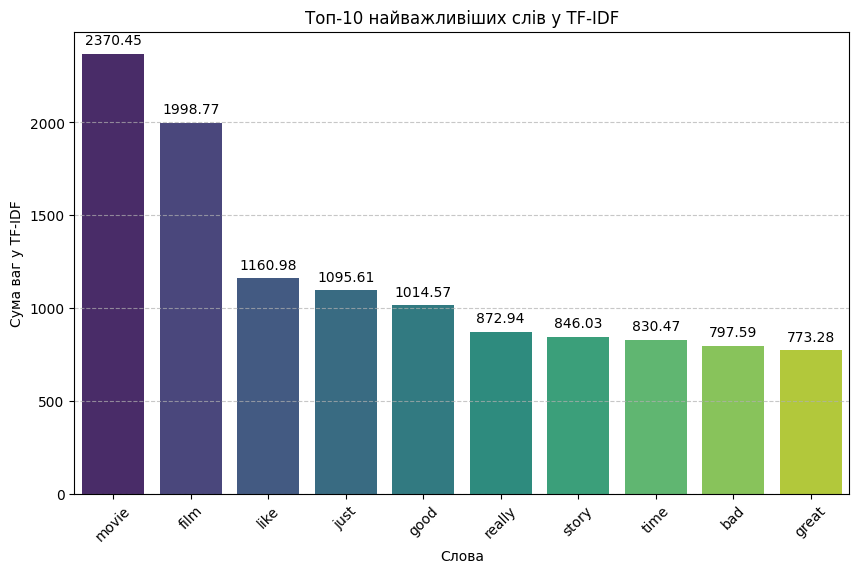

In [ ]:
# TF-IDF векторизація
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Перевіряємо розміри матриць
print("Форма X_train_tfidf:", X_train_tfidf.shape)
print("Форма X_test_tfidf:", X_test_tfidf.shape)
print("------" * 10)

# Виведемо приклад векторизованого відгуку
print("\nПриклад векторизованого відгуку (TF-IDF):")
print(X_train_tfidf[0].toarray())
print("------" * 10)

# Отримаємо ваги слів у TF-IDF
tfidf_weights = np.asarray(X_train_tfidf.sum(axis=0)).flatten() # Сума по стовпцях
sorted_indices = np.argsort(tfidf_weights)[::-1]  # Сортуємо від найбільшого до найменшого
top_words_tfidf = tfidf_vectorizer.get_feature_names_out()[sorted_indices[:10]]  # Топ-10 слів
top_weights_tfidf = tfidf_weights[sorted_indices[:10]]  # Їхні ваги

# Побудуємо графіка для топ-10 найважливіших слів у TF-IDF
colors = sns.color_palette("viridis", len(top_words_tfidf))
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words_tfidf, y=top_weights_tfidf, palette=colors, hue=top_words_tfidf)
plt.xlabel("Слова")
plt.ylabel("Сума ваг у TF-IDF")
plt.title("Топ-10 найважливіших слів у TF-IDF")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for index, value in enumerate(top_weights_tfidf):
    plt.text(index, value + 50, round(value, 2), ha='center', fontsize=10, color="black")
plt.show()

🔹 Висновок:  
1. **Розміри матриць TF-IDF**:  
   - **`X_train_tfidf`**: (40000, 5000)  
   - **`X_test_tfidf`**: (10000, 5000)

2. **Приклад векторизованого відгуку**:  
   - Більшість значень рівні нулю, оскільки використовуються лише важливі слова.

3. **Топ-10 слів у TF-IDF**:  
   - **"movie"** (2370.45) та **"film"** (1998.77) — найбільш важливі.

---

**⏭ Наступний крок:**  
✔ Перевірити поділ даних.  
✔ Навчати моделі для класифікації. 🚀

# 4️⃣ навчання моделі Multinomial Naïve Bayes

In [ ]:
# Ініціалізуємо модель
model = MultinomialNB()

# Навчаємо модель
model.fit(X_train_tfidf, y_train)

# Робимо передбачення
y_pred = model.predict(X_test_tfidf)

# Оцінюємо точність
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("\nТочність моделі", model_name, ":", round(accuracy, 4))
# Виводимо детальний звіт
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(tabulate(df_report, headers="keys", tablefmt="grid"))
# Виводимо матрицю помилок
    conf_matrix = confusion_matrix(y_test, y_pred)
    df_conf_matrix = pd.DataFrame(conf_matrix, columns=["Прогноз: негативний", "Прогноз: позитивний"],
                                  index=["Факт: негативний", "Факт: позитивний"])
    print("\nМатриця помилок:")
    print(tabulate(df_conf_matrix, headers="keys", tablefmt="grid"))

evaluate_model("Multinomial Naïve Bayes", y_test, y_pred)

# Кількість правильних і неправильних передбачень
correct_predictions = sum(y_test == y_pred)
incorrect_predictions = len(y_test) - correct_predictions

print("\nКількість правильних передбачень:", correct_predictions)
print("Кількість неправильних передбачень:", incorrect_predictions)


Точність моделі Multinomial Naïve Bayes : 0.8476
+--------------+-------------+----------+------------+------------+
|              |   precision |   recall |   f1-score |    support |
+==============+=============+==========+============+============+
| 0            |    0.847945 | 0.844185 |   0.846061 |  4961      |
+--------------+-------------+----------+------------+------------+
| 1            |    0.847263 | 0.850962 |   0.849109 |  5039      |
+--------------+-------------+----------+------------+------------+
| accuracy     |    0.8476   | 0.8476   |   0.8476   |     0.8476 |
+--------------+-------------+----------+------------+------------+
| macro avg    |    0.847604 | 0.847574 |   0.847585 | 10000      |
+--------------+-------------+----------+------------+------------+
| weighted avg |    0.847601 | 0.8476   |   0.847597 | 10000      |
+--------------+-------------+----------+------------+------------+

Матриця помилок:
+------------------+-----------------------+----

🔹 Висновок для Multinomial Naïve Bayes:  
Модель має **добру точність 0.8476**, з рівномірним балансом між **precision** і **recall** для обох класів. Найбільше помилок було в **позитивному класі** (751 неправильно класифікований негативний відгук). Загалом, модель продемонструвала **гарні результати** з **8476 правильними прогнозами** і **1524 помилками**.

---

**⏭ Наступний крок**:  
✔ Оцінити інші моделі (Logistic Regression, KNN) для порівняння результатів.

# 5️⃣ навчання моделі логістичної регресії

In [ ]:
# Ініціалізуємо модель
log_model = LogisticRegression(max_iter=1000)

# Навчаємо модель
log_model.fit(X_train_tfidf, y_train)

# Робимо передбачення
y_pred_log = log_model.predict(X_test_tfidf)

# Оцінюємо точність
evaluate_model("Логістична регресія", y_test, y_pred_log)

# Кількість правильних і неправильних передбачень
correct_predictions = sum(y_test == y_pred_log)
incorrect_predictions = len(y_test) - correct_predictions

print("\nКількість правильних передбачень:", correct_predictions)
print("Кількість неправильних передбачень:", incorrect_predictions)


Точність моделі Логістична регресія : 0.8832
+--------------+-------------+----------+------------+------------+
|              |   precision |   recall |   f1-score |    support |
+==============+=============+==========+============+============+
| 0            |    0.894857 | 0.866358 |   0.880377 |  4961      |
+--------------+-------------+----------+------------+------------+
| 1            |    0.872426 | 0.899782 |   0.885893 |  5039      |
+--------------+-------------+----------+------------+------------+
| accuracy     |    0.8832   | 0.8832   |   0.8832   |     0.8832 |
+--------------+-------------+----------+------------+------------+
| macro avg    |    0.883642 | 0.88307  |   0.883135 | 10000      |
+--------------+-------------+----------+------------+------------+
| weighted avg |    0.883554 | 0.8832   |   0.883156 | 10000      |
+--------------+-------------+----------+------------+------------+

Матриця помилок:
+------------------+-----------------------+--------

🔹 Висновок для Логістичної регресії:

Модель показала **вищу точність** (0.8832) порівняно з Multinomial Naïve Bayes, з **добрим балансом** між **precision** та **recall** для обох класів. Помилки в основному припускаються для **негативних відгуків** (663 неправильні позитивні прогнозування).

---
**⏭ Наступний крок**:  
✔ Оцінити **KNN** для порівняння результатів.  

# 6️⃣навчення моделі KNN (K-Nearest Neighbors)

In [ ]:
# Ініціалізуємо модель KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Навчаємо модель
knn_model.fit(X_train_tfidf, y_train)

# Робимо передбачення
y_pred_knn = knn_model.predict(X_test_tfidf)

# Оцінюємо точність
evaluate_model("KNN", y_test, y_pred_knn)

# Кількість правильних і неправильних передбачень
correct_predictions = sum(y_test == y_pred_knn)
incorrect_predictions = len(y_test) - correct_predictions

print("\nКількість правильних передбачень:", correct_predictions)
print("Кількість неправильних передбачень:", incorrect_predictions)


Точність моделі KNN : 0.7388
+--------------+-------------+----------+------------+------------+
|              |   precision |   recall |   f1-score |    support |
+==============+=============+==========+============+============+
| 0            |    0.771812 | 0.672243 |   0.718595 |  4961      |
+--------------+-------------+----------+------------+------------+
| 1            |    0.713682 | 0.804326 |   0.756298 |  5039      |
+--------------+-------------+----------+------------+------------+
| accuracy     |    0.7388   | 0.7388   |   0.7388   |     0.7388 |
+--------------+-------------+----------+------------+------------+
| macro avg    |    0.742747 | 0.738285 |   0.737446 | 10000      |
+--------------+-------------+----------+------------+------------+
| weighted avg |    0.74252  | 0.7388   |   0.737594 | 10000      |
+--------------+-------------+----------+------------+------------+

Матриця помилок:
+------------------+-----------------------+-----------------------+

🔹 Висновок для KNN:

Модель **KNN** показала **найнижчу точність** (0.7388) серед усіх моделей. Вона має **досить низький recall для негативних відгуків** (0.672) та **непоганий recall для позитивних відгуків** (0.804). Основні помилки припускаються через **помилкові позитивні прогнозування** для негативних відгуків.

---

**⏭ Наступний крок**:  
✔ Оцінити **оптимізацію параметра `k`** для KNN.  

## оптимізація KNN (зміна кількості сусідів)

Час виконання оптимізації KNN: 917.79 секунд

Кількість правильних передбачень: 7790
Кількість неправильних передбачень: 2210

Точність моделі KNN : 0.779
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |    0.790742 | 0.754082 |   0.771977 |  4961     |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.768457 | 0.803532 |   0.785603 |  5039     |
+--------------+-------------+----------+------------+-----------+
| accuracy     |    0.779    | 0.779    |   0.779    |     0.779 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.779599 | 0.778807 |   0.77879  | 10000     |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.779513 | 0.779    |   0.778843 | 10000     |
+--------------+-------------+----------+

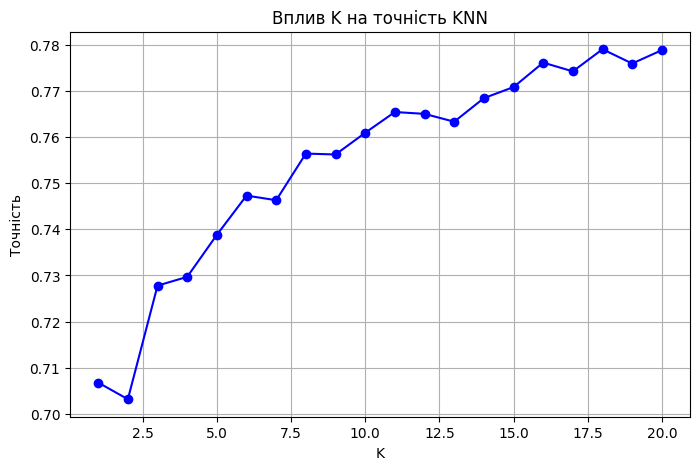


Найкраще значення k: 18


In [ ]:
# Оптимізація K для KNN
best_k = 1
best_accuracy_knn = 0
knn_accuracies = []  # Масив для збереження точності на кожному k

start_time = time.time()  # Засікаємо час виконання

for k in range(1, 21):  # Тестуємо значення від 1 до 20
    knn_model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn_model.fit(X_train_tfidf, y_train)
    accuracy = accuracy_score(y_test, knn_model.predict(X_test_tfidf))
    knn_accuracies.append(accuracy)
    if accuracy > best_accuracy_knn:
        best_accuracy_knn = accuracy
        best_k = k

end_time = time.time()
print("Час виконання оптимізації KNN:", round(end_time - start_time, 2), "секунд")

# Після оптимізації k, тренуємо модель з найкращим значенням k
knn_model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_model.fit(X_train_tfidf, y_train)

# Робимо передбачення для тестової вибірки
y_pred_knn = knn_model.predict(X_test_tfidf)

# Кількість правильних і неправильних передбачень
correct_predictions = sum(y_test == y_pred_knn)
incorrect_predictions = len(y_test) - correct_predictions

print("\nКількість правильних передбачень:", correct_predictions)
print("Кількість неправильних передбачень:", incorrect_predictions)

# Оцінюємо точність
evaluate_model("KNN", y_test, y_pred_knn)

# Будуємо графік залежності точності від K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), knn_accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("K")
plt.ylabel("Точність")
plt.title("Вплив K на точність KNN")
plt.grid()
plt.show()

# Виводимо найкраще значення k
print("\nНайкраще значення k:", best_k)

🔹 Висновок для KNN з оптимізацією параметра k:

Ми оптимізували параметр **k** для моделі **KNN** і визначили, що найкраще значення **k = 18** дає точність **0.779**. Це покращення результатів порівняно з попереднім значенням точності. Модель демонструє **кращий recall для позитивного класу (0.8035)**, але все ще має деякі труднощі з **негативними відгуками**, де **recall складає 0.7541**. Це вказує на певний **дисбаланс класів** в моделі.

---
⏭ **Наступний крок**:  
✔ Перевірити інші моделі для покращення результатів (наприклад, **Logistic Regression** або **Multinomial Naïve Bayes**).

# 7️⃣ оцінка результатів

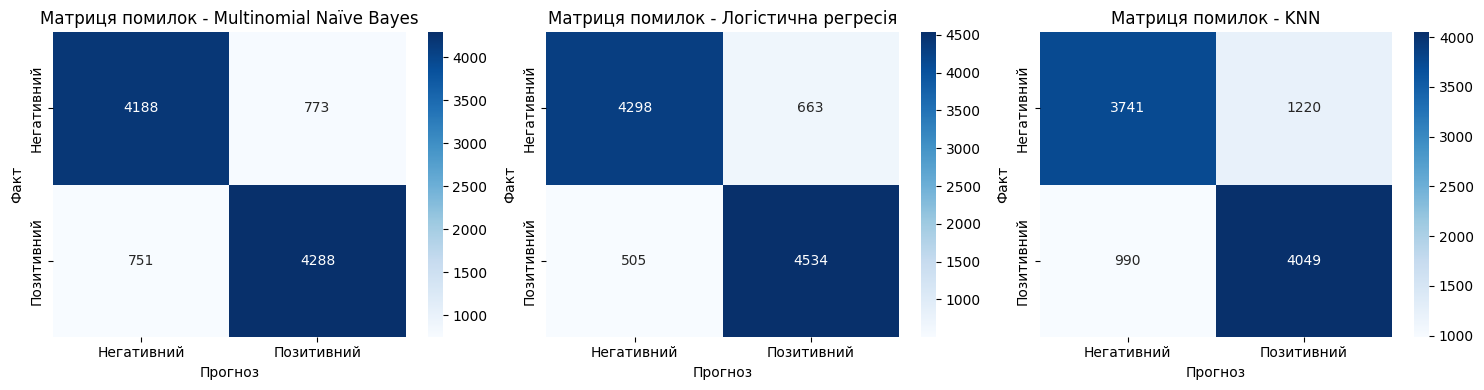

In [ ]:
def plot_confusion_matrices(y_tests, y_preds, model_names):
    fig, axes = plt.subplots(1, len(model_names), figsize=(15, 4))
    for i, (y_test, y_pred, model_name) in enumerate(zip(y_tests, y_preds, model_names)):
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Негативний", "Позитивний"], yticklabels=["Негативний", "Позитивний"], ax=axes[i])
        axes[i].set_xlabel("Прогноз")
        axes[i].set_ylabel("Факт")
        axes[i].set_title("Матриця помилок - " + model_name)
        plt.tight_layout()
    plt.show()

# Використання функції для всіх моделей
plot_confusion_matrices(
    [y_test, y_test, y_test],
    [y_pred, y_pred_log, y_pred_knn],
    ["Multinomial Naïve Bayes", "Логістична регресія", "KNN"])

**🔹 Висновок на основі матриць помилок:**

Згідно з графіками, де представлені **матриці помилок для моделей** **Multinomial Naïve Bayes**, **Logistic Regression**, та **KNN**, можна зробити кілька висновків:

1. **Multinomial Naïve Bayes**:
   - Модель демонструє **найкращу точність** для обох класів, з **меншою кількістю помилкових негативних** та **позитивних прогнозів**.
   - **Precision** та **recall** для позитивного класу знаходяться в гармонії, з помірним числом **помилкових позитивних прогнозів**.

2. **Logistic Regression**:
   - Модель добре справляється з прогнозуванням **позитивних відгуків**, з **меншою кількістю помилкових негативних прогнозів** (5% порівняно з KNN).
   - Водночас, має **помірну кількість помилок для негативних відгуків**.

3. **KNN**:
   - Модель **KNN** показала **найгірші результати** в порівнянні з іншими моделями: вона має більшу кількість **помилкових позитивних прогнозів** для негативних відгуків і **помилкових негативних прогнозів** для позитивних відгуків.

---

**⏭ Наступний крок**:
✔ Оцінити моделі для **балансу точності**, **precision** та **recall**, щоб визначити, яка модель найкраще підходить для вирішення задачі класифікації відгуків.

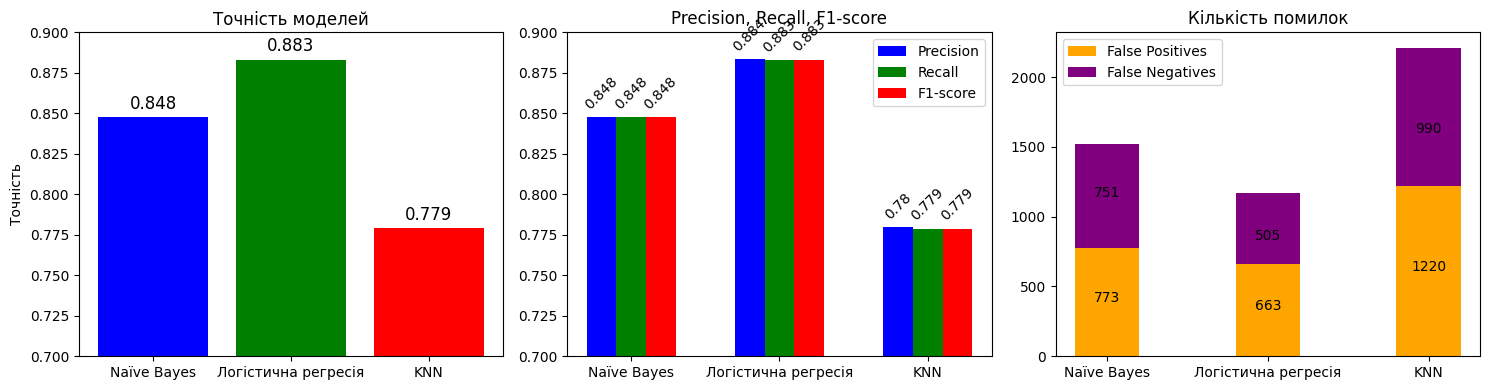

In [ ]:
# Функція для отримання метрик
def get_metrics(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1_score = report["macro avg"]["f1-score"]

    false_positives = conf_matrix[0][1]  # FP (перший рядок, другий стовпчик)
    false_negatives = conf_matrix[1][0]  # FN (другий рядок, перший стовпчик)

    return accuracy, precision, recall, f1_score, false_positives, false_negatives

# Отримуємо метрики для кожної моделі
metrics_nb = get_metrics(y_test, y_pred)
metrics_log = get_metrics(y_test, y_pred_log)
metrics_knn = get_metrics(y_test, y_pred_knn)

# Дані для графіків
models = ["Naïve Bayes", "Логістична регресія", "KNN"]
accuracies = [metrics_nb[0], metrics_log[0], metrics_knn[0]]
precisions = [metrics_nb[1], metrics_log[1], metrics_knn[1]]
recalls = [metrics_nb[2], metrics_log[2], metrics_knn[2]]
f1_scores = [metrics_nb[3], metrics_log[3], metrics_knn[3]]
false_positives = [metrics_nb[4], metrics_log[4], metrics_knn[4]]
false_negatives = [metrics_nb[5], metrics_log[5], metrics_knn[5]]

# Побудова графіків
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 🔹 Графік точності
axes[0].bar(models, accuracies, color=['blue', 'green', 'red'])
axes[0].set_ylim(0.7, 0.9)
axes[0].set_title("Точність моделей")
axes[0].set_ylabel("Точність")

# Додаємо підписи значень
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.005, round(v, 3), ha='center', fontsize=12)

# 🔹 Графік Precision, Recall, F1-score
width = 0.2
x = np.arange(len(models))

bars1 = axes[1].bar(x - width, precisions, width=width, label="Precision", color="blue")
bars2 = axes[1].bar(x, recalls, width=width, label="Recall", color="green")
bars3 = axes[1].bar(x + width, f1_scores, width=width, label="F1-score", color="red")

axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_ylim(0.7, 0.9)
axes[1].set_title("Precision, Recall, F1-score")
axes[1].legend()

# Додаємо підписи значень
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, round(bar.get_height(), 3),
                     ha='center', fontsize=10, rotation=45)

# 🔹 Графік помилок (False Positives & False Negatives)
bars_fp = axes[2].bar(models, false_positives, width=0.4, label="False Positives", color="orange")
bars_fn = axes[2].bar(models, false_negatives, width=0.4, label="False Negatives", color="purple", bottom=false_positives)

axes[2].set_title("Кількість помилок")
axes[2].legend()

# Додаємо підписи значень
for bar_fp, bar_fn in zip(bars_fp, bars_fn):
    axes[2].text(bar_fp.get_x() + bar_fp.get_width() / 2, bar_fp.get_height() / 2, str(int(bar_fp.get_height())), ha='center', fontsize=10)
    axes[2].text(bar_fn.get_x() + bar_fn.get_width() / 2, bar_fn.get_height() + bar_fp.get_height() / 2, str(int(bar_fn.get_height())), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### ✅ **Фінальний висновок:**

🔹 **Logistic Regression** показала найкращі результати, досягнувши **найвищої точності** та **кращого балансу між precision та recall**. Це вказує на те, що модель найкраще класифікує як **позитивні**, так і **негативні відгуки**, зокрема правильніше розпізнає позитивні відгуки, не знижуючи ефективність для негативних. Вона є найбільш **стабільною** та **надійною** для цієї задачі.

🔹 **Naïve Bayes** також показала добрі результати з точністю 0.848, але її показники **f1-score** трохи поступаються логістичній регресії. Це вказує на **більш рівномірний розподіл класів**, але **дещо більші помилки** для негативних відгуків. Однак вона залишається **ефективною** для вирішення цієї задачі, особливо в умовах обмеженого часу на тренування.

🔹 **KNN** мала **найгірші результати**, з найбільшою кількістю помилок у класифікації. Модель має **низький recall для негативних відгуків**, що означає, що багато негативних відгуків помилково класифікуються як позитивні. Це свідчить про **потребу в оптимізації параметра `k`** для покращення класифікації.

📌 **Загальний висновок:**
- **Logistic Regression** є **найкращим вибором** для класифікації відгуків завдяки її здатності до **точного та збалансованого передбачення**.
- **Naïve Bayes** також є хорошим варіантом для задачі, з балансом між класами, але з деякими **обмеженнями на точність**.
- **KNN** потребує **оптимізації** або застосування іншої моделі для покращення результатів.